# Capstone Project — The Battle of Neighbourhoods
## Introduction

Living in New Delhi since past 5 years i have explored it very well and love eating food so as we know New Delhi is the capital city of India.The city itself has a population of lacs. However, the much larger metro area has a population that exceeds 26 million.

Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .
##### Questions that can be asked using the above mentioned datasets
###### 1.What is best location in New Delhi City for Chinese Cuisine ?
###### 2.Which areas have large number of Chinese Resturant Market ?
###### 3.Which all areas have less number of resturant ?
###### 4.Which is the best place to stay if I prefer Chinese Cuisine ?
###### 5.What places are have best restaurant in New Delhi?


## Data

For this project we need the following data :

###### New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
###### Data source : Zomato kaggel dataset
###### Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
###### Nearby places in each locality of new delhi city.
###### Data source : Fousquare API
###### Description : By using this api we will get all the venues in each neighborhood.

## Approach
Collect the new delhi city data from Zomato kaggel dataset.
 Using FourSquare API we will find all venues for each neighborhood.
Filter out all venues that are nearby by locality.
Using aggregative rating for each resturant to find the best places.
Visualize the Ranking of neighborhoods using folium library(python).

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab



## Read the zomato resturant data from csv file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

## Data wrangling

In [4]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [6]:

df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

In [7]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

#### Showing restaurant cluter

In [8]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

### What places are have best restaurant in New Delhi?

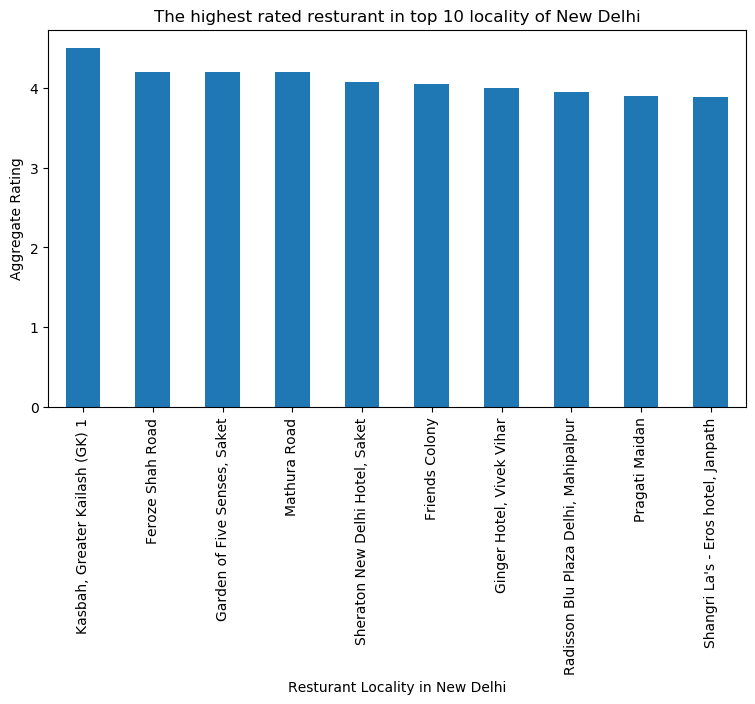

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


### What places are have worst restaurants in New Delhi?

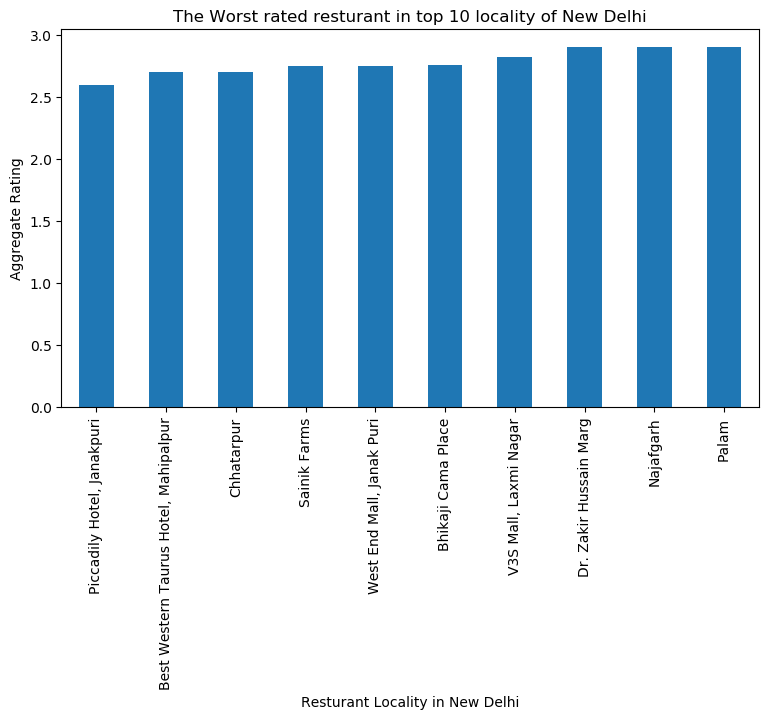

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

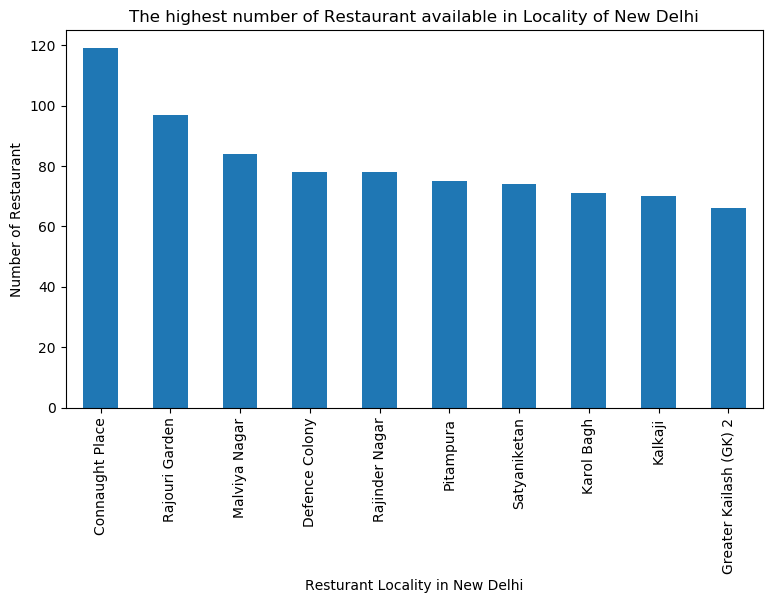

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


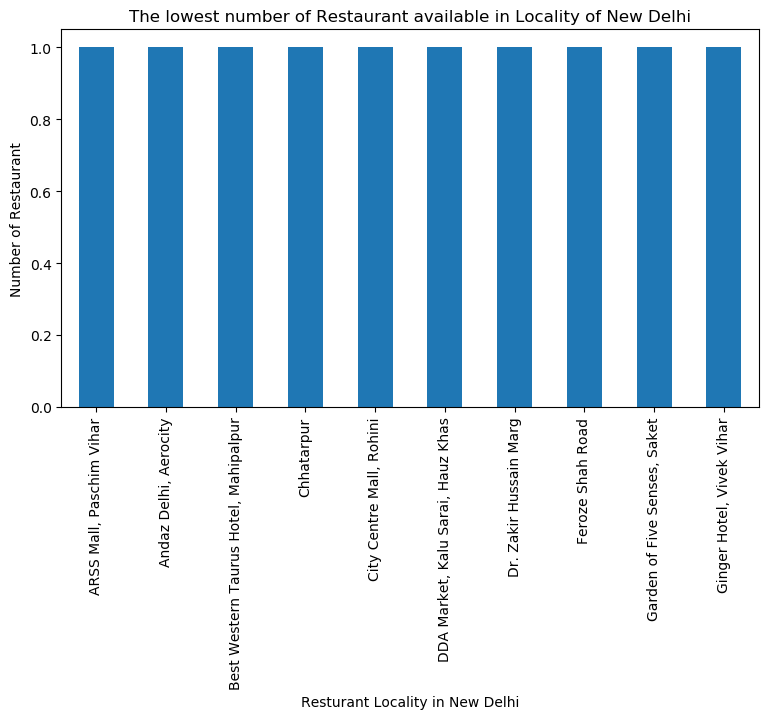

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


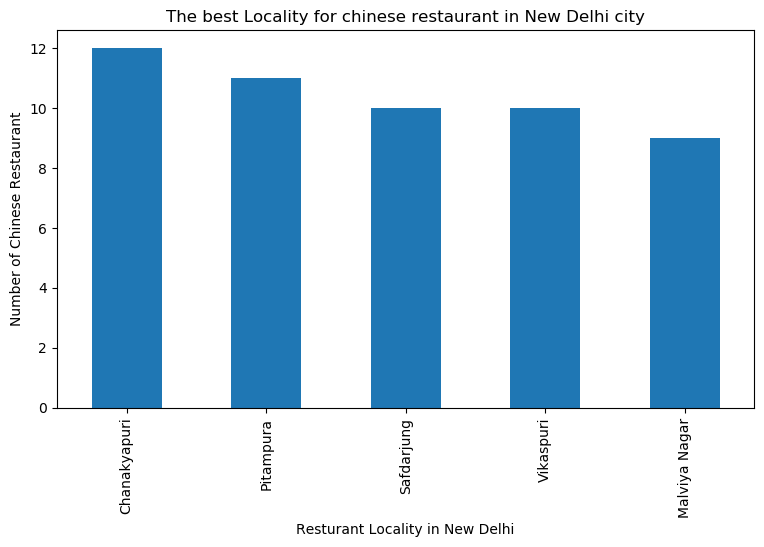

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

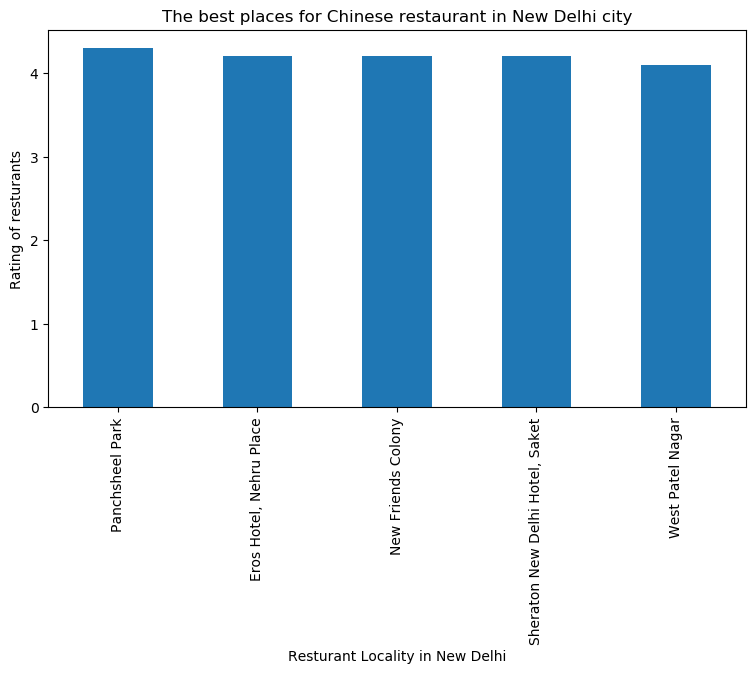

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

### Data transformation

In [15]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [16]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [17]:
df_final.shape

(240, 8)


### Define Foursquare Credentials and Version

In [18]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'LXDTWTY3C3TIQ2PNCOLLTK15T3J3XSKJ3DCTUBS30CI5A4B3' # Foursquare ID
CLIENT_SECRET = 'LXVMQTSK5EBER0KKSR1DVZEBPCFDC4M0TVX52FB5YGWVAKDH' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LXDTWTY3C3TIQ2PNCOLLTK15T3J3XSKJ3DCTUBS30CI5A4B3
CLIENT_SECRET:LXVMQTSK5EBER0KKSR1DVZEBPCFDC4M0TVX52FB5YGWVAKDH


In [19]:

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:

# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [21]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [22]:

new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         4                   4      4   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 13                  13     13   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          32                  32     32   
Yusuf Sarai                                    11                  11     11   
ibis New Delhi, Aerocity                       30                  30     30   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      4                4   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              13               13   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       32               32   
Yusuf Sarai                                 11               11   
ibis New Delhi, Aerocity                    30               30   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      4  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              13  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       32  
Yusuf Sarai                                 11  
ibis New Delhi, Aerocity                    30  

[238 rows x 6 columns]

In [23]:

print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 209 uniques categories.


In [24]:

## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Train Station  Turkish Restaurant  \
0                0                 0  ...              0                   0   
1                0                 0  ...              0                   0   
2                0                 0  ...              0                   0   
3                0                 0  ...              0                   0   
4                0                 0  ...              0                   0   

   Udupi Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                 0                              0                      0   
1                 0                              0                      0   
2                 0                              0                      0   
3                 0                              0                      0   
4                 0                              0                      0   

   Whisky Bar  Wine Bar  Wings Joint  Women's Store  Yoga Studio  
0           0         0            0              0            0  
1           0         0            0              0            0  
2           0         0            0              0            0  
3           0         0            0              0            0  
4           0         0            0              0            0  

[5 rows x 210 columns]

In [25]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111            0.00000   
1                           Adchini  0.000000            0.00000   
2     Aditya Mega Mall, Karkardooma  0.000000            0.00000   
3                          Aerocity  0.000000            0.00000   
4     Aggarwal City Mall, Pitampura  0.000000            0.00000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000            0.00000   
234                West Patel Nagar  0.000000            0.00000   
235           Worldmark 1, Aerocity  0.000000            0.03125   
236                     Yusuf Sarai  0.000000            0.00000   
237        ibis New Delhi, Aerocity  0.000000            0.00000   

     Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                  0.0                 0.0      0.0                 0.0   
1                  0.0                 0.0      0.0                 0.0   
2                  0.0                 0.0      0.0                 0.0   
3                  0.0                 0.0      0.0                 0.0   
4                  0.0                 0.0      0.0                 0.0   
..                 ...                 ...      ...                 ...   
233                0.0                 0.0      0.0                 0.0   
234                0.0                 0.0      0.0                 0.0   
235                0.0                 0.0      0.0                 0.0   
236                0.0                 0.0      0.0                 0.0   
237                0.0                 0.0      0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  ...  Train Station  \
0          0.000000              0.0          0.000000  ...       0.000000   
1          0.000000              0.0          0.000000  ...       0.000000   
2          0.000000              0.0          0.000000  ...       0.000000   
3          0.142857              0.0          0.142857  ...       0.000000   
4          0.000000              0.0          0.000000  ...       0.000000   
..              ...              ...               ...  ...            ...   
233        0.000000              0.0          0.000000  ...       0.000000   
234        0.000000              0.0          0.000000  ...       0.000000   
235        0.000000              0.0          0.000000  ...       0.031250   
236        0.000000              0.0          0.000000  ...       0.000000   
237        0.000000              0.0          0.000000  ...       0.033333   

     Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0.0               0.0                            0.0   
1                   0.0               0.0                            0.0   
2                   0.0               0.0                            0.0   
3                   0.0               0.0                            0.0   
4                   0.0               0.0                            0.0   
..                  ...               ...                            ...   
233                 0.0               0.0                            0.0   
234                 0.0               0.0                            0.0   
235                 0.0               0.0                            0.0   
236                 0.0               0.0                            0.0   
237                 0.0               0.0                            0.0   

     Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  \
0                      0.0         0.0       0.0          0.0            0.0   
1                      0.0         0.0       0.0          0.0            0.0   
2                      0.0         0.0       0.0          0.0            0.0   
3                      0.0         0.0       0.0          0.0            0.0   
4                      0.0         0.0       0.0          0

In [26]:
New_Delhi_grouped.shape

(238, 210)

In [27]:

## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2                  Sandwich Place  0.11
3  Multicuisine Indian Restaurant  0.11
4                          Market  0.11


----Adchini----
               venue  freq
0               Café  0.50
1                Pub  0.25
2  Indian Restaurant  0.25
3                ATM  0.00
4          Multiplex  0.00


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1          Multiplex   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1        Airport Lounge  0.14
2  Fast Food Restaurant  0.14
3           Coffee Shop  0.14
4   Rental Car Location  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0   Department Store  0.25
1        Pizza Place  0.25
2         Donut Shop  0.2

In [28]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini                  Café   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura           Pizza Place   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
234                West Patel Nagar           Pizza Place   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai     Indian Restaurant   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue  \
0          Sandwich Place                Market   
1       Indian Restaurant                   Pub   
2       Indian Restaurant         Shopping Mall   
3    Fast Food Restaurant           Coffee Shop   
4        Department Store     Indian Restaurant   
..                    ...                   ...   
233                  Café           Pizza Place   
234  Gym / Fitness Center     Indian Restaurant   
235           Coffee Shop             Hotel Bar   
236           Coffee Shop      Asian Restaurant   
237           Coffee Shop             Hotel Bar   

              4th Most Common Venue 5th Most Common Venue  \
0    Multicuisine Indian Restaurant           Pizza Place   
1                       Yoga Studio    Falafel Restaurant   
2                         Multiplex                  Café   
3                    Airport Lounge      Airport Terminal   
4                        Donut Shop  Fast Food Restaurant   
..                              ...                   ...   
233             American Restaurant             Multiplex   
234                        Pharmacy  Fast Food Restaurant   
235                 Bed & Breakfast   Japanese Restaurant   
236                           Hotel                   Bar   
237             Japanese Restaurant      Department Store   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0             Coffee Shop    Chinese Restaurant                   ATM   
1      Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
2                   Hotel     French Restaurant            Food Truck   
3     Rental Car Location           Yoga Studio    Frozen Yogurt Shop   
4      Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
..                    ...                   ...                   ...   
233        Clothing Store            Hookah Bar           Snack Place   
234   Fried Chicken Joint     French Restaurant            Food Truck   
235      Department Store        Breakfast Spot         Shopping Mall   
236                  Park     Korean Restaurant        Ice Cream Shop   
237        Breakfast Spot         Shopping Mall            Restaurant   

    9th Most Common Venue 10th Most Common Venue  
0         Airport Service                 Garden  
1              Food Truck             Food Court  
2              Food Court      Food & Drink Shop  
3     Fried Chicken Joint      French Restaurant  
4              Food Truck             Food Court  
..                    ...                    ...  
233     Indian Restaurant         Ice Cream Shop  
234            Food Court      Food & Drink Shop  
235            Restaurant     Punjabi Restaurant  
236   Japanese Restaurant             Food Truck  
237       Bed & Breakfast                 Bakery  

[238 rows x 11 columns]

### K - Means Clustering

In [30]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [43]:
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

C:\Users\srish\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               1   
1  Average, Good, Poor, Very Good         1560               3   
2                   Average, Good          434               1   
3                         Average           59               2   
4                         Average          126               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant        Sandwich Place                Market   
1                  Café     Indian Restaurant                   Pub   
2           Pizza Place     Indian Restaurant         Shopping Mall   
3                 Hotel  Fast Food Restaurant           Coffee Shop   
4           Pizza Place      Department Store     Indian Restaurant   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Multicuisine Indian Restaurant           Pizza Place           Coffee Shop   
1                     Yoga Studio    Falafel Restaurant    Frozen Yogurt Shop   
2                       Multiplex                  Café                 Hotel   
3                  Airport Lounge      Airport Terminal   Rental Car Location   
4                      Donut Shop  Fast Food Restaurant    Frozen Yogurt Shop   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Chinese Restaurant                   ATM       Airport Service   
1   Fried Chicken Joint     French Restaurant            Food Truck   
2     French Restaurant            Food Truck            Food Court   
3           Yoga Studio    Frozen Yogurt Shop   Fried Chicken Joint   
4   Fried Chicken Joint     French Restaurant            Food Truck   

  10th Most Common Venue  
0                 Garden  
1             Food Court  
2      Food & Drink Shop  
3      French Restaurant  
4             Food Court

In [44]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Clusters

### Cluster 1

In [45]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
5    28.700516    3.040000                  Average, Good, Poor          594   
11   28.562580    3.750000             Average, Good, Very Good          875   
14   28.693969    3.378571                        Average, Good         2343   
15   28.691136    3.390909             Average, Good, Very Good          485   
18   28.696302    3.300000                        Average, Good          415   
22   28.654105    3.085714                              Average           80   
24   28.649658    3.800000  Average, Excellent, Good, Very Good         1410   
28   28.650254    3.166667                        Average, Good         1217   
34   28.720602    3.600000                                 Good          119   
36   28.692546    3.480000                        Average, Good          948   
48   28.630149    2.950000                  Average, Good, Poor          471   
50   28.645084    3.235000       Average, Good, Poor, Very Good         2578   
51   28.557166    3.080000                   Average, Very Good         1120   
57   28.699837    3.376471             Average, Good, Very Good         2460   
73   28.643036    3.000000                              Average            7   
87   28.582031    3.117143       Average, Good, Poor, Very Good         2140   
89   28.539003    3.150000                  Average, Good, Poor          893   
90   28.642755    3.450000                        Average, Good          322   
94   28.538153    3.117143                  Average, Good, Poor         3642   
95   28.681154    3.453448             Average, Good, Very Good         5267   
101  28.667644    3.300000                              Average          132   
103  28.652501    3.080000                  Average, Good, Poor         2196   
104  28.656263    3.097619                        Average, Good          965   
106  28.575525    3.126316                        Average, Good          998   
107  28.569394    3.252381                        Average, Good         1525   
130  28.724100    3.133333                              Average          325   
132  28.706295    3.256000             Average, Good, Very Good         1717   
135  28.579641    3.180000                        Average, Good          202   
136  28.658244    3.240000                        Average, Good          567   
138  28.556145    3.040909                  Average, Good, Poor          637   
142  28.693270    3.519149             Average, Good, Very Good         7642   
151  28.592153    3.200000                              Average           14   
154  28.618935    2.900000                              Average            9   
156  28.630734    3.185714                        Average, Good          244   
157  28.629505    2.600000                              Average           67   
160  28.712975    3.066667                              Average          121   
169  28.667261    3.200000                              Average           76   
180  28.534499    3.000000                  Average, Good, Poor          173   
187  28.629634    2.942857                              Average          151   
192  28.526856    4.066667                            Very Good          802   
193  28.569983    3.133333                  Average, Good, Poor          988   
195  28.527731    3.450000                        Average, Good          396   
200  28.564288    3.200000                              Average            6   
218  28.552403    3.833333                      Good, Very Good         1133   
220  28.523519    3.700000                                 Good          281   
221  28.560593    3.733333             Average, Good, Very Good          615   
224  28.636921    2.819231                  Average, Good, Poor         2265   
225  28.524070    3.686364             Average, Good, Very Good         4001   
230  28.658041    3.400000                              Average           19   
232  28.667

### Cluster 2

In [46]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
0    28.668945    3.100000                                    Average   
2    28.656131    3.275000                              Average, Good   
4    28.690020    3.033333                                    Average   
13   28.690182    3.090000                        Average, Good, Poor   
23   28.656414    3.358182                   Average, Good, Very Good   
26   28.538688    3.130303                        Average, Good, Poor   
33   28.657388    3.320000                              Average, Good   
42   28.576161    2.983333                        Average, Good, Poor   
43   28.643320    3.287500             Average, Good, Poor, Very Good   
47   28.681582    3.046875                        Average, Good, Poor   
49   28.602169    2.900000                                    Average   
55   28.617102    4.200000                                  Very Good   
61   28.668181    3.400000                                    Average   
66   28.699373    3.252174                              Average, Good   
77   28.631728    3.060714             Average, Good, Poor, Very Good   
84   28.630942    3.122000             Average, Good, Poor, Very Good   
85   28.648885    3.561111                   Average, Good, Very Good   
92   28.584294    3.100000                                    Average   
97   28.662972    3.533333                         Average, Very Good   
98   28.651527    3.490909                   Average, Good, Very Good   
99   28.648795    3.238028             Average, Good, Poor, Very Good   
109  28.689561    3.311111                         Average, Very Good   
110  28.635391    3.040385             Average, Good, Poor, Very Good   
113  28.541242    2.984615                                    Average   
116  28.486576    2.950000                                    Average   
118  28.646549    3.200000                                    Average   
126  28.602860    2.973214                        Average, Good, Poor   
133  28.708185    3.344444                   Average, Good, Very Good   
140  28.627959    3.004167                                    Average   
144  28.591092    3.200000                        Average, Good, Poor   
152  28.544464    3.525000                         Average, Very Good   
155  28.669160    3.148214                        Average, Good, Poor   
159  28.613748    3.900000                         Average, Excellent   
164  28.668055    3.393333        Average, Excellent, Good, Very Good   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
198  28.636712    3.023529                              Average, Poor   
201  28.651299    3.500000                              Average, Good   
208  28.562469    2.971429                        Average, Good, Poor   
222  28.628988    3.260000                        Average, Good, Poor   
231  28.637492    3.062264                        Average, Good, Poor   

     No_of_Votes  Cluster Labels 1st Most Common Venue  \
0            117               1     Indian Restaurant   
2            434               1           Pizza Place   
4            126               1           Pizza Place   
13           971               1     Indian Restaurant   
23          6668               1     Indian Restaurant   
26          2578               1                Market   
33           636               1           Pizza Place   
42           542               1     Indian Restaurant   
43          2570               1     Indian Restaurant   
47          1224               1     Indian Restaurant   
49             7               1     Indian Restaurant   
55          3010               1     Indian Restaurant   
61            33               1           Pizza Place   
66           973               1     Indian Restaurant   
77          1650               1     Indian Restaurant   
84          1738               1     Indian Restaurant   
85          7411               

### Cluster 3

In [47]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
71   28.641003    3.650000                        Average, Good          367   
72   28.705700    3.350000                        Average, Good          278   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
128  28.608252    2.945000                        Average, Good          406   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
209  28.631362    3.537500                        Average, Good         1666   
216  28.594859    3.800000                      Good, Very Good          287   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 2                 Hotel  Fast Food Restaurant   
10                2                 Hotel   Japanese Restaurant   
12                2                 Hotel         Movie Theater   
19                2                 Hotel             Hotel Bar   
25                2     Indian Restaurant   Japanese Restaurant   
35                2                 Hotel           Pizza Place   
56                2                 Hotel                  Café   
60                2                 Hotel      Asian Restaurant   
69                2                 Hotel           Coffee Shop   
70                2                 Hotel            Restaurant   
71                2     Indian Restaurant                 Hotel   
72                2                Garden           Coffee Shop   
83                2                 Hotel           Coffee Shop   
111               2                 Hotel     Indian Restaurant   
112               2                 Hotel           Coffee Shop   
119               2                 Hotel     Indian Restaurant   
128               2                 Hotel           Yoga Studio   
148               2            Restaurant         Shopping Mall   
161               2  Fast Food Restaurant           Pizza Place   
162               2                  Café                 Hotel   
167               2  Gym / Fitness Center             Racetrack   
168               2                 Hotel     Indian Restaurant   
173               2      Department Store  Fast Food Restaurant   
19

### Cluster 4

In [48]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
1    28.537063    3.292308             Average, Good, Poor, Very Good   
9    28.659870    3.281481                              Average, Good   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
179  28.572117    3.871429                   Average, Good, Very Good   
227  28.559704    3.278261                   Average, Good, Very Good   

     No_of_Votes  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1           1560               3                  Café     Indian Restaurant   
9           1309               3                  Café          Burger Joint   
86          4011               3                  Café        Ice Cream Shop   
179         1871               3           Coffee Shop             Multiplex   
227         1043               3                  Café    Chinese Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1                     Pub           Yoga Studio    Falafel Restaurant   
9           Burrito Place           Gaming Cafe    Frozen Yogurt Shop   
86                    Gym    Falafel Restaurant    Frozen Yogurt Shop   
179                  Café            Restaurant      Asian Restaurant   
227  Fast Food Restaurant            Restaurant           Coffee Shop   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1      Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
9     Fried Chicken Joint     French Restaurant            Food Truck   
86    Fried Chicken Joint     French Restaurant            Food Truck   
179       Thai Restaurant     Electronics Store         Shopping Mall   
227      Asian Restaurant     Food & Drink Shop      Department Store   

    9th Most Common Venue     10th Most Common Venue  
1              Food Truck                 Food Court  
9              Food Court          Food & Drink Shop  
86             Food Court          Food & Drink Shop  
179                  Park    Comfort Food Restaurant  
227                   Spa  Middle Eastern Restaurant

### Cluster 5

In [49]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
16   28.630440    3.208333                  Average, Good, Poor         1779   
17   28.557846    3.220000                  Average, Good, Poor         1875   
..         ...         ...                                  ...          ...   
223  28.619954    2.905714                        Average, Poor          242   
226  28.525054    3.322222                        Average, Good         1940   
228  28.596073    3.052941                        Average, Good          305   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
236  28.648177    3.675000             Average, Good, Very Good          876   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
6                 4    Chinese Restaurant                   Bar   
7                 4           Coffee Shop         Shopping Mall   
8                 4                  Café               Stadium   
16                4     Indian Restaurant                  Café   
17                4                  Café  Fast Food Restaurant   
..              ...                   ...                   ...   
223               4     Indian Restaurant    Chinese Restaurant   
226               4                  Café  Fast Food Restaurant   
228               4           Snack Place         Shopping Mall   
229               4                  Café                Bakery   
236               4           Pizza Place  Gym / Fitness Center   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
6             Coffee Shop                 Hotel            Steakhouse   
7                    Café        Clothing Store      Asian Restaurant   
8             Coffee Shop           Golf Course           Music Venue   
16                 Bakery                 Hotel               Theater   
17            Pizza Place           Coffee Shop            Restaurant   
..                    ...                   ...                   ...   
223           Yoga Studio    Falafel Restaurant    Frozen Yogurt Shop   
226        Sandwich Place    Chinese Restaurant                  Bank   
228                  Café           Yoga Studio    Falafel Restaurant   
229   American Restaurant              Tea Room           Cheese Shop   
236     Indian Restaurant              Pharmacy  Fast Food Restaurant   

    6th Most Common Venue    7th Most Common Venue  \
6                  Market              Yoga Studio   
7    Fast Food Restaurant       Italian Restaurant   
8           Metro Station     Other Great Outdoors   
16              Nightclub                   Arcade   
17     Chinese Restaurant                    Hotel   
..                    ...                      ...   
223   Fried Chicken Joint        French Restaurant   
226                   Bar                      Spa   
228   Fried Chicken Joint        French Restaurant   
229    Chinese Restaurant  North Indian Restaurant   
236   Fried Chicken Joint        French Restaurant   

             8th Most Common Venue 9th Most Common Venue  \
6                Fish & Chips Shop    Frozen Yogurt Shop   
7               Chinese Restaurant     Indian Restaurant   
8                     Dessert Shop                 Hotel   
16                            Pool           Art Gallery   
17                  Nightlife Spot         Movie Theater   
..                             ...                   ...   
223                     Food Truck            Food Court   
226  Vegetarian / Vegan Restaurant           Pizza Place   
228                     Food Truck            Food Court   
229                    Coffee Shop  Fast Food Restaurant   
236                     Food Truck            Food Court   

# Conclusion:
Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
Pancsheel park, Nehru place have the best Chinese Resturant.
Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
#### Cluster 1: It is most recommended for Indian Restaurants. 
#### Cluster 2: It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5: It is most recommended for Fast food.
#### Cluster 4: It is most recommended for the cafe and pizza.